# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

In [2]:
import mysql.connector
from mysql.connector.connection import MySQLConnection

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [3]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [4]:
cursor = con.cursor()

In [5]:
sql = """
SELECT MAX(hire_date), MIN(hire_date)
FROM employees
"""

In [6]:
cursor.execute(sql)
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [7]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

In [8]:
cursor = con.cursor()

In [9]:
sql_1 = """
SELECT s.emp_no, s.salary, s.from_date, s.to_date
FROM salaries s
WHERE s.to_date = (
    SELECT MAX(s2.to_date)
    FROM salaries s2
    WHERE s2.emp_no = s.emp_no
)
AND s.salary = (
    SELECT MAX(s2.salary)
    FROM salaries s2
    WHERE s2.emp_no = s.emp_no
    AND s2.to_date = s.to_date
)
ORDER BY s.emp_no;
"""

In [10]:
cursor.execute(sql_1)

In [11]:
rows = cursor.fetchall()

In [12]:
field_names = [i[0] for i in cursor.description]

In [13]:
import pandas as pd

In [14]:
res = pd.DataFrame(rows, columns=field_names)

In [15]:
display(res.columns, res.shape, res.head(3))

Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

(300024, 4)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [16]:
print(res.to_date.dtype)

object


In [35]:
import datetime

In [61]:
count_9999_year = (res.to_date == datetime.date(9999, 1, 1)).sum()
count_other_years = (res.to_date != datetime.date(9999, 1, 1)).sum()

In [62]:
print(f'Значень to_date рівних 9999-01-01 - {count_9999_year}')
print(f'Інших значень to_date - {count_other_years}')

Значень to_date рівних 9999-01-01 - 240124
Інших значень to_date - 59900


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [64]:
salary_array = pd.read_sql(f"SELECT salary from salaries where to_date ='9999-01-01'", con)

In [22]:
from matplotlib import pyplot as plt

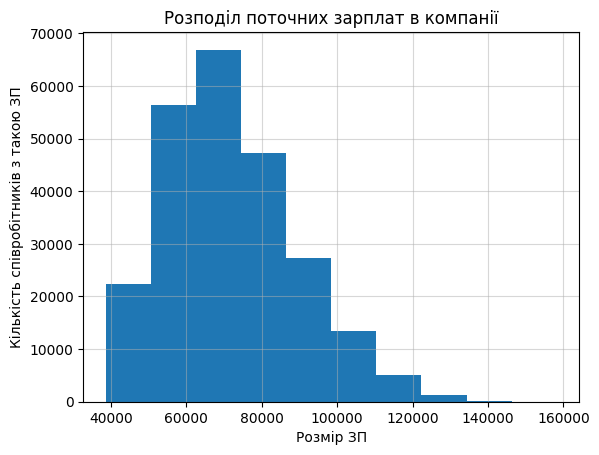

In [23]:
plt.hist(salary_array, bins=10)

plt.xlabel("Розмір ЗП")
plt.ylabel("Кількість співробітників з такою ЗП")
plt.title("Розподіл поточних зарплат в компанії")

plt.grid(axis='both', alpha=.5);

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [65]:
con.close()